In [34]:
import compute_charge_dist as fz
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

import PeHeat_Functions as peh
import parametric_fz as fzpar
import dust_size_dist as sizedist

from matplotlib.colors import LogNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker

import pickle

import yt
from yt.units import pc, kpc, second, Kelvin, gram, erg, cm

import MCMCFit as mcmc

%matplotlib inline

In [3]:
filename = "TotaHeating_parametric_0pcent.pkl"
#data_dir = "/home/jcibanezm/codes/run/PeHeat/ParametricHeating/" #DustBox
data_dir = "/Users/juan/codes/run/PeHeating/" #Laptop

pkl_file = open("%s%s"%(data_dir, filename))
heatDict = pickle.load(pkl_file)
pkl_file.close

<function close>

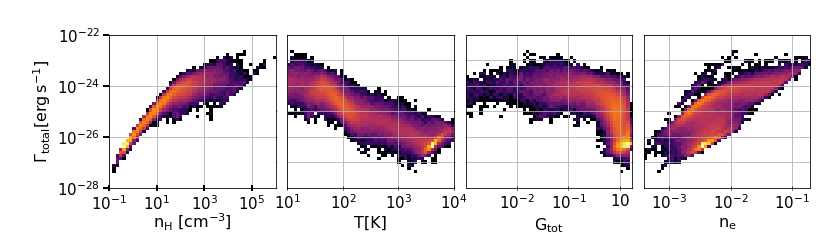

In [37]:
xsize = 11
ysize = 3

nfigs_x = 4
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.181
wpad = 0.10
wwpad = 0.015

xs_panel = 0.84 / nfigs_x 
ys_panel = 0.708 / nfigs_y 

# Formatting tick labels in log scale.
def format_func(value, tick_number):
    # find number of multiples of pi/2
    return "10$^{%.i}$"%value



##########################################################################################################
############################             n          #######################################
############################################################################################################

ax = fig.add_axes([0, 0, 1, 1])

#ax.plot([0,1], [0,1], visible=False)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

#ax.text(0.18, 0.955, "5 AA", fontsize=20, horizontalalignment='center')

plt.axis('off')

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 0
jj = 0

ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

cax = ax.hist2d(np.log10(heatDict["nH"]), np.log10(heatDict["PeHtot"]), bins=50, norm=LogNorm(), cmap="inferno", range=[[-1, 6.0],[-28, -22]])

ax.grid("on")
ax.tick_params(axis='x', which='both', bottom='on', top='off', direction= 'inout',labelbottom='on') # labels along the bottom edge are off
ax.set_ylabel("$\Gamma_{\mathrm{total}}[\mathrm{erg \, s}^{-1}]$", fontsize=16)
ax.set_xlabel("n$_{\mathrm{H}}$ [cm$^{-3}$]", fontsize=16, labelpad=-1)
ax.tick_params(axis='x', which='both', bottom='on', labelbottom='on')
ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)


majors = [-1, 1, 3, 5]
ax.xaxis.set_major_locator(ticker.FixedLocator(majors))
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

#ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))


#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 1
jj = 0

ax = fig.add_axes([wpad + ii*(xs_panel+wwpad), hpad + jj*ys_panel, xs_panel, ys_panel])

cax = ax.hist2d(np.log10(heatDict["temp"]), np.log10(heatDict["PeHtot"]), bins=50, norm=LogNorm(), cmap="inferno", range=[[1, 4],[-28, -22]])

ax.grid("on")

ax.tick_params(axis='x', which='both', bottom='on', labelbottom='on', labelsize=15)
#ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)

ax.tick_params(axis='x', which='both', bottom='on', top='off', direction= 'inout',labelbottom='on') # labels along the bottom edge are off

ax.set_xlabel("T[K]", fontsize=16)

ax.tick_params(axis='y', left="off", which='major', length=6, width=2, labelsize=0)

#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))


#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 2
jj = 0

ax = fig.add_axes([wpad + ii*(xs_panel+wwpad), hpad + jj*ys_panel, xs_panel, ys_panel])

cax = ax.hist2d(np.log10(heatDict["Gtot"]), np.log10(heatDict["PeHtot"]), bins=50, norm=LogNorm(), cmap="inferno", range=[[-2.99, np.log10(1.7)],[-28, -22]])

ax.grid("on")

ax.tick_params(axis='x', which='both', bottom='on', labelbottom='on', labelsize=15)
#ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)

ax.tick_params(axis='x', which='both', bottom='on', top='off', direction= 'inout',labelbottom='on') # labels along the bottom edge are off

ax.set_xlabel("G$_{\mathrm{tot}}$", fontsize=16)

ax.tick_params(axis='y', left="off", which='major', length=6, width=2, labelsize=0)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))


#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 3
jj = 0

ax = fig.add_axes([wpad + ii*(xs_panel+wwpad), hpad + jj*ys_panel, xs_panel, ys_panel])

cax = ax.hist2d(np.log10(heatDict["new_ne"]), np.log10(heatDict["PeHtot"]), bins=50, norm=LogNorm(), cmap="inferno", range=[[np.log10(np.min(heatDict["new_ne"])), np.log10(np.max(heatDict["new_ne"]))],[-28, -22]])

ax.grid("on")

ax.tick_params(axis='x', which='both', bottom='on', labelbottom='on', labelsize=15)
#ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)

ax.tick_params(axis='x', which='both', bottom='on', top='off', direction= 'inout',labelbottom='on') # labels along the bottom edge are off

ax.set_xlabel("n$_{\mathrm{e}}$", fontsize=16)

ax.tick_params(axis='y', left="off", which='major', length=6, width=2, labelsize=0)

#ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))



#fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/TotalHeating_parametric.df", format="pdf")
fig.savefig("/Users/juan/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/TotalHeating_parametric.pdf", format="pdf")


fig.show()


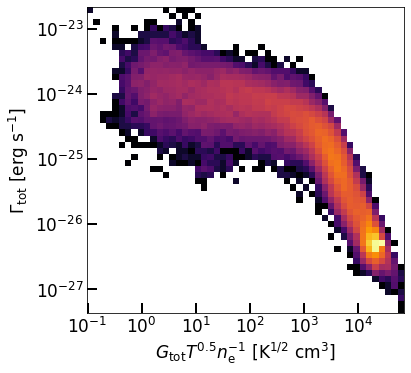

In [49]:
fig = plt.figure(figsize=(5.5,5))

ax = fig.add_axes([0.19, 0.13, 0.80, 0.85])

from matplotlib.ticker import MaxNLocator
def format_func(value, tick_number):
    return "10$^{%i}$"%value


GTn = (heatDict["Gtot"])*np.sqrt(heatDict["temp"])/heatDict["new_ne"]

ax.hist2d(np.log10(GTn), np.log10(heatDict["PeHtot"]), bins=50, norm=LogNorm(), cmap="inferno")

#ax.set_ylabel("T [K]", fontsize=25)
#
ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=17, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=17, direction="in")


#ax.set_ylim(-0.9, 4.99)
ax.set_ylabel("$\Gamma_{\mathrm{tot}}$ [erg s$^{-1}$]", fontsize=17)
ax.set_xlabel("$G_{\mathrm{tot}}T^{0.5} n_{\\mathrm{e}}^{-1}$ [K$^{1/2}$ cm$^{3}$]", fontsize=17)

ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func))

#ax.set_yscale("log")

#ax.set_xlim(np.log10(np.min(cdist["nH"])), 4.5)
#fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/TotalHeating_parametric_GTn.df", format="pdf")
fig.savefig("/Users/juan/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/TotalHeating_parametric_GTn.pdf", format="pdf")


fig.show()

I need to compute the power absorved by dust grains!. Right now I have no idea how to do that.

In [58]:
ncells = 2500000
for i in range(ncells):
    if (i*10.%ncells==0):
        print("Progress %i"%(i*100.//ncells))

Progress 0
Progress 10
Progress 20
Progress 30
Progress 40
Progress 50
Progress 60
Progress 70
Progress 80
Progress 90
